In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["What do you want to achieve with your education?"]]
df2.head()

,What do you want to achieve with your education?
0,"I am looking forward to a decent job, and mayb..."
1,To help others
2,Success as explained before\n
3,Try and contribute to all the developments and...
4,I want to be a best physician. Overall a Best ...


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["What do you want to achieve with your education?"].apply(clean)
print(df2['Cleaned Reviews'])

0      I am looking forward to a decent job and maybe...
1                                        To help others 
2                           Success as explained before 
3      Try and contribute to all the developments and...
4      I want to be a best physician Overall a Best S...
                             ...                        
141                     Practical knowledge in my field 
142                                             Learning
143                 Education is for life not for living
144                                   Social commitment 
145    To be a professional who would work for the be...
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-396145a2ded5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["What do you want to achieve with your education?"].apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)
print(df2['POS stopword'])

<ipython-input-9-43a10399ae26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)


0      [I, be, look, forward, to, a, decent, job, and...
1                                     [To, help, others]
2                          [Success, a, explain, before]
3      [Try, and, contribute, to, all, the, developme...
4      [I, want, to, be, a, best, physician, Overall,...
                             ...                        
141                [Practical, knowledge, in, my, field]
142                                           [Learning]
143         [Education, be, for, life, not, for, living]
144                                 [Social, commitment]
145    [To, be, a, professional, who, would, work, fo...
Name: POS tagged, Length: 146, dtype: object
0      [(look, v), (forward, r), (decent, a), (job, n...
1                               [(help, v), (others, n)]
2                           [(Success, n), (explain, n)]
3      [(Try, n), (contribute, v), (development, n), ...
4      [(want, v), (best, a), (physician, n), (Overal...
                             ...           

<ipython-input-9-43a10399ae26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].apply(lemmatize)
df2.head()

<ipython-input-10-5fc106740a5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].apply(lemmatize)


,What do you want to achieve with your education?,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"I am looking forward to a decent job, and mayb...",I am looking forward to a decent job and maybe...,"[I, be, look, forward, to, a, decent, job, and...","[(look, v), (forward, r), (decent, a), (job, n...",look forward decent job maybe come startup d...
1,To help others,To help others,"[To, help, others]","[(help, v), (others, n)]",help others
2,Success as explained before\n,Success as explained before,"[Success, a, explain, before]","[(Success, n), (explain, n)]",Success explain
3,Try and contribute to all the developments and...,Try and contribute to all the developments and...,"[Try, and, contribute, to, all, the, developme...","[(Try, n), (contribute, v), (development, n), ...",Try contribute development advancement happe...
4,I want to be a best physician. Overall a Best ...,I want to be a best physician Overall a Best S...,"[I, want, to, be, a, best, physician, Overall,...","[(want, v), (best, a), (physician, n), (Overal...",want best physician Overall Best Surgeon


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-11-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-11-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-11-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What do you want to achieve with your education?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"I am looking forward to a decent job, and mayb...",I am looking forward to a decent job and maybe...,"[I, be, look, forward, to, a, decent, job, and...","[(look, v), (forward, r), (decent, a), (job, n...",look forward decent job maybe come startup d...,0.422917,0.191667,Positive
1,To help others,To help others,"[To, help, others]","[(help, v), (others, n)]",help others,0.000000,0.000000,Neutral
2,Success as explained before\n,Success as explained before,"[Success, a, explain, before]","[(Success, n), (explain, n)]",Success explain,0.000000,0.300000,Positive
3,Try and contribute to all the developments and...,Try and contribute to all the developments and...,"[Try, and, contribute, to, all, the, developme...","[(Try, n), (contribute, v), (development, n), ...",Try contribute development advancement happe...,0.000000,0.000000,Neutral
4,I want to be a best physician. Overall a Best ...,I want to be a best physician Overall a Best S...,"[I, want, to, be, a, best, physician, Overall,...","[(want, v), (best, a), (physician, n), (Overal...",want best physician Overall Best Surgeon,0.200000,0.666667,Positive


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-12-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-12-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-12-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What do you want to achieve with your education?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"I am looking forward to a decent job, and mayb...",I am looking forward to a decent job and maybe...,"[I, be, look, forward, to, a, decent, job, and...","[(look, v), (forward, r), (decent, a), (job, n...",look forward decent job maybe come startup d...,0.422917,0.191667,Positive
1,To help others,To help others,"[To, help, others]","[(help, v), (others, n)]",help others,0.000000,0.000000,Neutral
2,Success as explained before\n,Success as explained before,"[Success, a, explain, before]","[(Success, n), (explain, n)]",Success explain,0.000000,0.300000,Positive
3,Try and contribute to all the developments and...,Try and contribute to all the developments and...,"[Try, and, contribute, to, all, the, developme...","[(Try, n), (contribute, v), (development, n), ...",Try contribute development advancement happe...,0.000000,0.000000,Neutral
4,I want to be a best physician. Overall a Best ...,I want to be a best physician Overall a Best S...,"[I, want, to, be, a, best, physician, Overall,...","[(want, v), (best, a), (physician, n), (Overal...",want best physician Overall Best Surgeon,0.200000,0.666667,Positive


In [13]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Positive    71
Neutral     67
Negative     8
Name: TextBlob_Analysis, dtype: int64


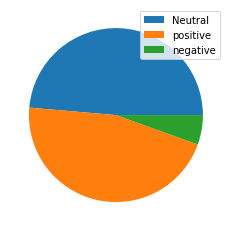

In [14]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [15]:
df3=df2.copy()
print(df3.head())

    What do you want to achieve with your education?  \
0  I am looking forward to a decent job, and mayb...   
1                                    To help others    
2                      Success as explained before\n   
3  Try and contribute to all the developments and...   
4  I want to be a best physician. Overall a Best ...   

                                     Cleaned Reviews  \
0  I am looking forward to a decent job and maybe...   
1                                    To help others    
2                       Success as explained before    
3  Try and contribute to all the developments and...   
4  I want to be a best physician Overall a Best S...   

                                          POS tagged  \
0  [I, be, look, forward, to, a, decent, job, and...   
1                                 [To, help, others]   
2                      [Success, a, explain, before]   
3  [Try, and, contribute, to, all, the, developme...   
4  [I, want, to, be, a, best, physician, Overa

In [16]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3["What do you want to achieve with your education?"].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,What do you want to achieve with your education?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"I am looking forward to a decent job, and mayb...",I am looking forward to a decent job and maybe...,"[I, be, look, forward, to, a, decent, job, and...","[(look, v), (forward, r), (decent, a), (job, n...",look forward decent job maybe come startup d...,0.422917,0.191667,Positive,0.5994,Positive
1,To help others,To help others,"[To, help, others]","[(help, v), (others, n)]",help others,0.000000,0.000000,Neutral,0.4019,Neutral
2,Success as explained before\n,Success as explained before,"[Success, a, explain, before]","[(Success, n), (explain, n)]",Success explain,0.000000,0.300000,Positive,0.5719,Positive
3,Try and contribute to all the developments and...,Try and contribute to all the developments and...,"[Try, and, contribute, to, all, the, developme...","[(Try, n), (contribute, v), (development, n), ...",Try contribute development advancement happe...,0.000000,0.000000,Neutral,0.0000,Neutral
4,I want to be a best physician. Overall a Best ...,I want to be a best physician Overall a Best S...,"[I, want, to, be, a, best, physician, Overall,...","[(want, v), (best, a), (physician, n), (Overal...",want best physician Overall Best Surgeon,0.200000,0.666667,Positive,0.8658,Positive


In [18]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     100
Positive     46
Name: Vader Analysis, dtype: int64

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [20]:
df3['SWN analysis'] = df3['POS stopword'].apply(sentiwordnetanalysis)

0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.25 0.0 0.75
0.75 0.0 0.25
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.5 0.0 0.5
0.5 0.0 0.5
0.25 0.0 0.75
0.25 0.25 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.625 0.125 0.25
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.875 0.0 0.125
0.125 0.0 0.875
0.75 0.0 0.25
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.625 0.375
0.125 0.0 0.875
0.0 0.0 1.0
0.5 0.0 0.5
0.125 0.375 0.5
0.0 0.0 1.0
0.75 0.0 0.25
0.0 0.0 1.0
0.25 0.0 0.75
0.125 0.0 0.875
0.25 0.0 0.75
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.25 0.0 0.75
0.75 0.0 0.25
0.5 0.0 0.5
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.25 0.5 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.25 0.75
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.25 0.0 0.75

In [21]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     74
Positive    62
Negative     9
Name: SWN analysis, dtype: int64

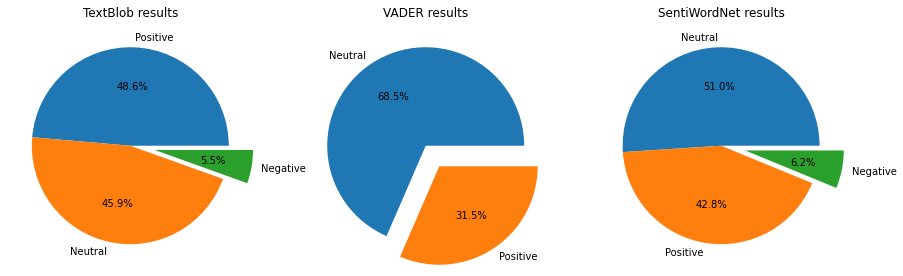

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()